<h1 align="center">Práctica 1. La subsecuencia creciente más larga (LIS) </h1>
<h2 style="display:block; margin-top:5px;" align="center">Algorítmica</h3>
<h3 style="display:block; margin-top:5px;" align="center">Grado en Ingeniería Informática (Computación)</h3>
<h3 style="display:block; margin-top:5px;" align="center">2024-2025</h3>    
<h3 style="display:block; margin-top:5px;" align="center">Universitat Politècnica de València</h3>
<br>

**Pon aquí tú nombre:**

Yassin Pellicer Lamla

## Índice
1. ### [Descripción del problema](#descripcion)
1. ### [Actividad 1: Plantear una ecuación recursiva](#act_traza)
1. ### [Actividad 2: Calcular la longitud con un algoritmo iterativo](#act_iterativo)
1. ### [Actividad 3: Recuperar la secuencia con backpointers](#act_con_backpointers)
1. ### [Actividad 4: Recuperar la secuencia sin backpointers](#act_sin_backpointers)
1. ### [Actividad 5 (opcional): Problemas relacionados](#problemas_relacionados)
1. ### [Actividad 6 (opcional): mejora del coste asintótico](#act_opcional)


<a id='descripcion'></a>

# El problema de la subsecuencia creciente más larga

**Descripción del problema**

Dada una secuencia de $N$ números enteros:

$x_1,x_2,\ldots,x_N$

nos piden encontrar una subsecuencia:

$x_{i_1}, x_{i_2}, \ldots x_{i_k}$ (donde $1\leq i_1 < i_2 < \cdots < i_k \leq N$)

que sea estrictamente creciente, es decir,
$x_{i_1} < x_{i_2} < \cdots < x_{i_k}$.

Además, nos piden encontrar alguna de las subsecuencias crecientes de
mayor longitud (decimos *alguna de* porqué no tiene por qué ser
única).

Por ejemplo, para la secuencia $10,3,5,12,7,20,18$ una posible
subsecuencia sería $10,3,20$ pero ésta no es creciente. Un ejemplo de
secuencia creciente es $10,12,20$ pero ésta tampoco es la de mayor
longitud puesto que es de longitud 3 y existen otras de mayor
longitud: $3,5,12,20$ es de mayor longitud (porque no hay otras de
longitud mayor a 4) pero no es la única ya que $3,5,12,18$ también es
creciente y de la misma longitud.

Este problema se puede resolver por programación dinámica. Aunque esta
forma de resolver el problema no es asintóticamente óptima (tiene un
coste $O(N^2)$ y se conocen soluciones con coste $O(N \log N)$)
resulta bastante sencillo de resolver y es un buen ejemplo para
practicar con la técnica de programación dinámica.

Como es habitual en la resolución de problemas mediante la técnica de
programación dinámica, vamos a preocuparnos inicialmente del problema
de encontrar la **longitud** de la subsecuencia creciente más larga y
no de qué subsecuencia concreta da lugar a esa longitud máxima.

Solamente después de haber resuelto el problema de obtener la longitud de manera
iterativa es cuando plantearemos recuperar la subsecuencia mediante la técnica
conocida coloquialmente como *recuperar el camino*.


<a id='act_traza'></a>
## Actividad 1: Plantear una ecuación recursiva

Volviendo a la secuencia del ejemplo: $10,3,5,12,7,20,18$

Nuestro objetivo es calcular, para cada elemento de la secuencia, cuál
es la *longitud* de una subsecuencia estrictamente creciente **que
termina en dicho elemento**.

> Esto es muy importante porque **NO** se trata de obtener la longitud de la mayor subsecuencia creciente en la última casilla del vector sino de obtener la longitud en todas las casillas y luego quedarnos con la de mayor valor.

Debes plantear una ecuación recursiva donde:

- El primer elemento solamente puede formar parte de una secuencia de longitud 1.
- En general, una subsecuencia creciente que termina en $x_N$ tiene
  como penúltimo elemento un elemento $x_i$ con $i<N$ tal que $x_i <
  X_N$.
  
La formalización del problema para un vector de talla N corresponde a dar una expresión que, haciendo uso de la ecuación recursiva, indique el valor que nos interesa. En muchos casos será una llamada inicial, pero en este ya ves que hay que maximizar sobre muchos valores.



La función recursiva que calcula la longitud de la subsecuencia creciente más larga que termina en $i$, $\text{LIS}(i)$, es:

$$
\text{LIS}(i) =
\begin{cases}
1\; si \;\; \nexists j \; \mid\; 0 \leq j \leq i \; \wedge (X_j < X_i) \\
1+ max(LIS(i-k)\; \forall k\; \mid \; 0 < k \leq N-i \; \wedge (X_k < X_i)) \text{ en otro caso}
\end{cases}
$$

La longitud de la subsecuencia creciente más larga ($\text{LIS}$) es:

$$
\text{LIS} = \text{LIS}(N)
$$

In [1]:
list = [10,7,8,12,7,20,18,6]

def lis(arr, i):
    if i == 0:
        return 1
    mx = 1
    for prev in range(i):
        if arr[prev] < arr[i]:
            mx = max(mx, lis(arr, prev) + 1)
    return mx
print("Length of lis is", lis(list, 7))


Length of lis is 1


<a id='act_iterativo'></a>
## Actividad 2: Calcular la longitud con un algoritmo iterativo

Realiza la transformación de recursiva a iterativa implementado un
algoritmo iterativo que calcule, para cada elemento de la secuencia,
la longitud de la mayor subsecuencia creciente que termina en cada
posición.

Por ejemplo, para la siguiente entrada:

```
ejercicio2([210, 816, 357, 107, 889, 635, 733, 930, 842, 542])
```

El ejercicio 2 debería calcular el siguiente vector:

```
>>> [1, 2, 2, 1, 3, 3, 4, 5, 5, 3]
```


In [2]:
from typing import List

ejemplo = [210, 816, 357, 107, 889, 635, 733, 930, 842, 542]

def ejercicio2(x:List[int]) -> List[int]:
  lis = [0] * len(x)
  
  for i in range(len(x)):
    idx_list = []
    
    for j in range(i, -1, -1):
      if x[i] > x[j]:
        idx_list.append(lis[j])
        
      if j == 0:
        if len(idx_list) == 0: lis[i] += 1; break
        idx = lis.index(max(idx_list))
        lis[i] += lis[idx]+1
        
  return lis

# def ejercicio2(x:List[int]) -> List[int]:
#   lis = [1] * len(x)
  
#   for i in range(1,len(x)):
#     for j in range(i):
#       if x[j] < x[i]:
#         lis[i] = max(lis[i], lis[j] + 1)
        
#   return lis

# ejercicio2(ejemplo)

ejercicio2(ejemplo)
#[1, 2, 2, 1, 3, 3, 4, 5, 5, 3]

[1, 2, 2, 1, 3, 3, 4, 5, 5, 3]

La subsecuencia creciente de mayor longitud no tiene que terminar
necesariamente en el último elemento del vector. Una vez resuelto los
ejercicios 1 y 2, es obvio que la mayor longitud se puede obtener
calculando el máximo del vector generado en el ejercicio anterior.

```
>>> max([1, 2, 2, 1, 3, 3, 4, 5, 5, 3])
5
```



In [120]:
def longitudSubsecuenciaCreciente(x:List[int]) -> int:
    return max(ejercicio2(x))

longitudSubsecuenciaCreciente(ejemplo)
#5

5

<a id='act_con_backpointers'></a>
## Actividad 3: Recuperar la secuencia con backpointers

Una vez resuelto el problema de obtener la longitud de la subsecuencia
creciente más larga, vamos a recuperar una (de las posiblemente más de una) subsecuencias de dicha
longitud. Tienes 2 opciones:

- Utilizar punteros hacia atrás o *backpointers*: consiste en crear un
  vector paralelo al vector solución donde nos apuntamos, para cada
  elemento de la secuencia, cuál sería su predecesor en la
  subsecuencia creciente más larga. Una vez terminado el proceso de
  programación dinámica, basta con recuperar la secuencia desde su
  último elemento hacia atrás empezando por la posición donde la
  longitud en el  vector solución es máxima.

- Calcular el camino sin punteros hacia atrás: Se trata de realizar el
  mismo recorrido hacia atrás sin utilizar un vector auxiliar. En ese
  caso, hay que recalcular, solamente para los elementos de la
  subsecuencia buscada, su predecesor.

Vamos a empezar con la versión con backpointers. Ahora debes guardarte en otro vector el índice del elemento responsable de la maximización que hacías en el ejercicio 2. Ten en cuenta que hay elementos que puede que no tengan predecesor (imagina un elemento que es menor que todos sus anteriores):

In [147]:
def subsecuenciaConBackpointers(x:List[int]) -> (int, List[int]): # type: ignore
  N = len(x)
  sol = [1] * N
  back = [-1] * N

  for i in range(1, N):
    for j in range(i):
      if x[j] < x[i] and sol[j] + 1 > sol[i]:
        sol[i] = max(sol[i] , sol[j] + 1)
        back[i] = j
  print(back)
  print(sol)
  
  max_l = max(sol)
  max_i = sol.index(max_l)
  
  return_list = []; current = max_i
  while current != -1:
    return_list.append(x[current])
    current = back[current]
  
  return_list.reverse()
  return (max_l, return_list)

    
subsecuenciaConBackpointers(ejemplo)
#(5, [210, 357, 635, 733, 842])

[-1, 0, 0, -1, 1, 2, 5, 6, 6, 2]
[1, 2, 2, 1, 3, 3, 4, 5, 5, 3]


(5, [210, 357, 635, 733, 930])

<a id='act_sin_backpointers'></a>
## Actividad 4: Recuperar la secuencia sin backpointers

Se trata de realizar el mismo recorrido hacia atrás sin utilizar un vector auxiliar. En ese caso, hay que recalcular, solamente para los elementos de la subsecuencia buscada, su predecesor.

Para ello, en la etapa de recuperar el camino hay que recalcular de nuevo de dónde venía ese valor.

In [159]:
def subsecuenciaSinBackpointers(x:List[int]) -> (int, List[int]): # type: ignore
  N = len(x)
  sol = [1] * N

  for i in range(0, N):
    for j in range(i):
      if x[j] < x[i] and sol[j] + 1 > sol[i]:
        sol[i] = max(sol[i] , sol[j] + 1)
  print(sol)
  
  max_l = max(sol)
  max_i = sol.index(max_l)

  return_list = [x[max_i]]; current =  max_i
  for i in range(max_i, -1, -1): 
    if sol[i] == sol[current] - 1 and x[i] < x[current]:
      current = i
      return_list.append(x[i])
  return_list.reverse()
  return (max_l, return_list)

    
subsecuenciaSinBackpointers(ejemplo)
#(5, [210, 357, 635, 733, 842])

[1, 2, 2, 1, 3, 3, 4, 5, 5, 3]


(5, [210, 357, 635, 733, 930])

<a id='problemas_relacionados'></a>

## Actividad 5 (opcional): Problemas relacionados

El problema de encontrar la subsecuencia creciente de mayor longitud
está directamente relacionado con otros problemas bien conocidos en
programación dinámica:

- La subsecuencia común más larga (Longest Common Subsequence o LCS).
- El camino más largo en un grafo acíclico.

Intenta razonar cómo se puede expresar el problema que nos ocupa en
términos de alguno de estos dos problemas.


(opcional, explicar la relación, si no has visto alguno de esos problemas en clase de teoría déjalo en *stand by* y plantéalo cuando se vea)

<a id='act_opcional'></a>

## Actividad 6 (opcional): mejora del coste asintótico

El algoritmo que se os ha propuesto tiene coste cuadrático, con lo que
resulta mucho peor que otra solución conocida con coste $O(N \log N)$).

El coste dominante está en la parte de buscar la mayor longitud entre
todos los elementos anteriores en el vector que tengan un valor
inferior.

> El bucle interno, ¡vaya!

Se propone utilizar un vector auxiliar `menores` que
almacene, para cada posible longitud de la subsecuencia creciente, el
**menor** valor asociado a una secuencia de dicha longitud. Ejemplo:

Utilizando la secuencia anterior $10,3,5,12,7,20,18$, asignamos el
valor $10$ a la secuencia de longitud 1 (`menores = [10]`) y
procesamos el resto de elementos:

- Cuando visitamos $3$, al ser menor que $10$ no podemos construir una
  secuencia creciente de longitud 2 pero actualizamos el menor valor
  asociado a una secuencia de longitud 1, que pasa a ser $3$ (`menores = [3]`).
  
- Cuando visitamos $5$, lo comparamos directamente con $3$ mirando
  únicamente el vector `menores`. Como $5$ es mayor, sabemos que la
  longitud asociada será 2 y actualizamos el vector `menores` que
  pasará a ser `[3,5]`.
  
- Al visitar `12` buscamos el primer valor en `menores`, desde el
  final, que sea menor que `12`, y éste es `5`, con lo que podemos
  asociar a `12` la longitud 3 y añadimos 12 a `menores`.

- Al procesar `7` buscamos de nuevo en `menores=[3,5,12]` desde el
  final, el primer valor inferior es `5`, con lo que actualizamos
  `menores` a `[3,5,7]` y asociamos a `7` la longitud 3.
  
- Y así sucesivamente...

Con esto el bucle interno del algoritmo ha de recorrer el vector
`menores` y no el vector original, y además basta con parar al llegar
a un valor inferior al que estamos visitando.

A poco que pienses verás que el vector `menores` permanece siempre
ordenado (es estrictamente creciente). La solución óptima se
basa en utilizar la búsqueda dicotómica en este vector, aunque una búsqueda lineal también es eficiente $O(N \cdot M)$, con $N >> M$ en la mayoría de casos.



In [5]:
def ejercicio_opcional(x:List[int]) -> (int, List[int]): # type: ignore
    # con o sin búsqueda dicotómica
    N = len(x)
    sol = [None]*N
    # completar

    
    


ejercicio_opcional(ejemplo)
#(5, [210, 357, 635, 733, 842])

(5, [210, 357, 635, 733, 842])

In [6]:
ejercicio_opcional([10,3,5,12,7,5,18])
#(4, [3, 5, 7, 18])

(4, [3, 5, 7, 18])

Discrepancias: 0


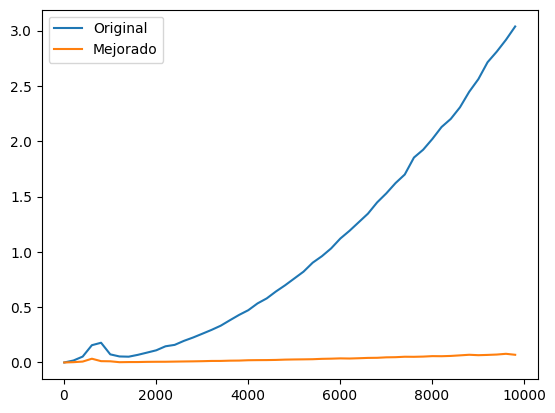

In [7]:
import random
import time
import matplotlib.pyplot as plt

talla, mejorado, original = [], [], []
error = 0
for N in range(10, 10001, 200):
    talla.append(N)
    instance = [random.randint(1,100000) for i in range(N)]
    
    # original N*N
    tini = time.process_time()
    resul1 = subsecuenciaConBackpointers(instance)
    tfin = time.process_time()
    original.append(tfin-tini)
    # opcional N*M o  N*log(M)
    tini = time.process_time()
    resul2 = ejercicio_opcional(instance)
    tfin = time.process_time()
    mejorado.append(tfin-tini)
    if len(set([resul1[0], resul2[0]])) != 1:
        error += 1

print('Discrepancias:', error)
           
plt.plot(talla, original, label='Original')
plt.plot(talla, mejorado, label='Mejorado')
plt.legend(loc='upper left')
plt.show()